<a href="https://colab.research.google.com/github/cjfghk5697/CS231n/blob/main/Lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS231N lecture note
**An image classifier** <br>
no obvious way to hard-code the algorithm for recognizing a cat, or other classes. Because everything is made up of many factors. For example, A cat has different feacture with other cats. Like color, age, stripe etc. So, How do computer recgonize a cat?

In [ ]:
def classify_image(image):
  #Some magic here?
  return class_label

**Data-Driven Approach**<br>


1.   Collect a dataset of images and labels
2.   Use Machine Learning to train a classifer
3.   Evaluate the classifier on new images

In [ ]:
def train(images, labels): #Memorize all data and labels (simple)
  #Machine learning!
  return model

def predict(model, test_images): #Predict the lable of the most similar trainig image(similar too, but hard Data-Driven)
  #Use model to predict labels
  return test_labels

**Distance Metric to compare images ** <br>
L1 distances: d1(I1,I2)=∑p|Ip1−Ip2|


It is really simple. This kind of stupid. but it does some reasonable things sometimes.

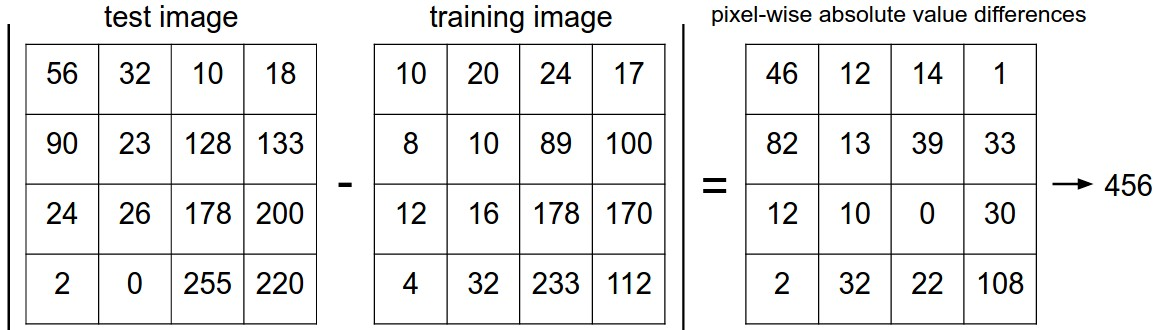

In [ ]:
import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X #there's not really much to do here.
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test): 
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

**Q:With N examples, how fast are training and prediction?**
<br>A:Train O(1), predictO(N)
<br>
This is bad: we want classifiers that aew fast at prediction; slow for training is ok